In [1]:
# Let's use pokemon dataset for interesting machine learning training.
# Our objectives for this training is to complete three task.
# Task 1: Select one fire, water, and grass pokemon for your fight, please choose the best.
# Task 2: Regression, understand the factor influencing a pokemon attack.
# Task 3: Classification, find out the pokemon is legendary or not.

# Pandas is for data analysis and Seaborn for visualizations
import pandas as pd

# Load data from csv
df = pd.read_csv('Pokemon.csv')

# Show the first five rows
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
# As you see the data is not clean, have duplicate id and NaN value
# Let's clean up the data first
# Convert all colums to lowercase
df.columns = df.columns.str.lower()

# Rename columns name for readability
df.rename(columns={'#': 'id'}, inplace=True)
df.rename(columns={'type 1': 'primary_type'}, inplace=True)
df.rename(columns={'type 2': 'secondary_type'}, inplace=True)
df.rename(columns={'sp. atk': 'special_atk'}, inplace=True)
df.rename(columns={'sp. def': 'special_def'}, inplace=True)

# Remove any Pokemon with duplicated id numbers except for the first one
df.drop_duplicates('id', keep='first', inplace=True)

# Replace any missing values in type 2 with 'None'
df['secondary_type'].fillna(value='None', inplace=True)

# Show the first five rows again
df.head()

,id,name,primary_type,secondary_type,total,hp,attack,defense,special_atk,special_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False


In [3]:
# Data is clean now, let's start the data analysis
# Understand the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 799
Data columns (total 13 columns):
id                721 non-null int64
name              721 non-null object
primary_type      721 non-null object
secondary_type    721 non-null object
total             721 non-null int64
hp                721 non-null int64
attack            721 non-null int64
defense           721 non-null int64
special_atk       721 non-null int64
special_def       721 non-null int64
speed             721 non-null int64
generation        721 non-null int64
legendary         721 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 73.9+ KB


In [4]:
# Show each primary_type consist how many pokemon
df.groupby(['primary_type']).size()

primary_type
Bug          63
Dark         28
Dragon       24
Electric     36
Fairy        17
Fighting     25
Fire         47
Flying        3
Ghost        23
Grass        66
Ground       30
Ice          23
Normal       93
Poison       28
Psychic      47
Rock         41
Steel        22
Water       105
dtype: int64

In [5]:
# Show each primary_type consist how many pokemon using crosstab
pd.crosstab(index=df["primary_type"], columns="count")

col_0,count
primary_type,
Bug,63
Dark,28
Dragon,24
Electric,36
Fairy,17
Fighting,25
Fire,47
Flying,3
Ghost,23


In [6]:
#-------------------------------------------------------------------------------------------------------------------------------------------#

## Task 1: Select one fire, water, and grass pokemon for your fight, please choose the best.

# Filter pokemon by grass, water and fire
grass_pokemon = df[df['primary_type'] == 'Grass']
water_pokemon = df[df['primary_type'] == 'Water']
fire_pokemon = df[df['primary_type'] == 'Fire']

# Filter secondary type
grass_poison_pokemon = grass_pokemon[grass_pokemon['secondary_type'] == 'Poison']
water_psychic_pokemon = water_pokemon[water_pokemon['secondary_type'] == 'Psychic']
fire_fighting_pokemon = fire_pokemon[fire_pokemon['secondary_type'] == 'Fighting']

# Describe are use to generates descriptive statistics that summarize the central tendency
grass_poison_pokemon.describe()

,id,total,hp,attack,defense,special_atk,special_def,speed,generation
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,189.785714,399.000000,63.785714,68.428571,58.214286,84.642857,72.142857,51.785714,2.142857
std,222.461121,86.842917,19.407289,19.492461,15.967171,21.073524,20.164161,20.532071,1.657484
min,1.000000,280.000000,40.000000,30.000000,35.000000,50.000000,30.000000,15.000000,1.000000
25%,43.250000,318.500000,50.000000,56.250000,46.000000,71.250000,65.000000,40.000000,1.000000
50%,69.500000,397.500000,60.000000,67.500000,59.000000,85.000000,72.500000,52.500000,1.000000
75%,383.250000,483.500000,73.500000,81.500000,68.750000,100.000000,80.000000,63.750000,3.750000
max,591.000000,525.000000,114.000000,105.000000,85.000000,125.000000,105.000000,90.000000,5.000000


In [7]:
# Choose the grass posion pokemon with speed 90 based on above describe()
my_grass_pokemon = grass_poison_pokemon[grass_poison_pokemon['speed'] == 90]

# Repeat the same step to for selecting water pokemon
water_psychic_pokemon.describe()

,id,total,hp,attack,defense,special_atk,special_def,speed,generation
count,4.000000,4.000000,4.000000,4.0,4.000000,4.0,4.000000,4.000000,4.00
mean,119.750000,453.750000,85.000000,72.5,85.000000,85.0,78.750000,47.500000,1.25
std,56.340483,93.574836,16.832508,5.0,18.708287,30.0,28.975564,45.552168,0.50
min,79.000000,315.000000,60.000000,65.0,65.000000,40.0,40.000000,15.000000,1.00
25%,79.750000,446.250000,82.500000,72.5,76.250000,85.0,70.000000,26.250000,1.00
50%,100.500000,490.000000,92.500000,75.0,82.500000,100.0,82.500000,30.000000,1.00
75%,140.500000,497.500000,95.000000,75.0,91.250000,100.0,91.250000,51.250000,1.25
max,199.000000,520.000000,95.000000,75.0,110.000000,100.0,110.000000,115.000000,2.00


In [8]:
# Choose the water psyhic pokemon with defense 110 based on above describe()
my_water_pokemon = water_psychic_pokemon[water_psychic_pokemon['defense'] == 110]

# Repeat the same step to for selecting fire pokemon
fire_fighting_pokemon.describe()

,id,total,hp,attack,defense,special_atk,special_def,speed,generation
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,382.500000,470.000000,80.000000,100.500000,62.166667,91.166667,62.166667,74.000000,4.000000
std,108.897658,66.654332,18.286607,18.447222,7.833688,15.854547,7.833688,20.218803,0.894427
min,256.000000,405.000000,60.000000,78.000000,52.000000,70.000000,52.000000,55.000000,3.000000
25%,290.500000,408.250000,67.000000,87.000000,56.250000,79.750000,56.250000,57.500000,3.250000
50%,391.500000,473.000000,78.000000,98.500000,62.500000,92.500000,62.500000,72.500000,4.000000
75%,472.250000,529.500000,87.500000,116.000000,68.750000,103.000000,68.750000,80.750000,4.750000
max,500.000000,534.000000,110.000000,123.000000,71.000000,110.000000,71.000000,108.000000,5.000000


In [10]:
# Choose the fire fighting pokemon with defense 110 based on above describe()
my_fire_pokemon = fire_fighting_pokemon[fire_fighting_pokemon['attack'] == 123]

# My three best pokemon
pd.concat([my_grass_pokemon, my_water_pokemon, my_fire_pokemon])

,id,name,primary_type,secondary_type,total,hp,attack,defense,special_atk,special_def,speed,generation,legendary
452,407,Roserade,Grass,Poison,515,60,70,65,125,105,90,4,False
86,80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,1,False
559,500,Emboar,Fire,Fighting,528,110,123,65,100,65,65,5,False


In [12]:
#-------------------------------------------------------------------------------------------------------------------------------------------#

## Task 2: Regression, understand the factor influencing a pokemon attack.

# Import train_test_split for spliting the data
from sklearn.cross_validation import train_test_split
# Use to modelling the relationship between dependent and indepent variable, prediction, forecasting, or error reduction.
from sklearn.linear_model import LinearRegression
# Use to measures the average of the squares of the errors
from sklearn.metrics import mean_squared_error
# Numpy mathematical computation on arrays and matrices
import numpy as np
# Matplotlib is a Python 2D plotting library which produces publication quality figures
import matplotlib.pyplot as plot

# First model, determine how does defense influencing attack
###############################################################################################

# Dependent variable
target = df['attack']
# Independent variable
features = df[['defense']]
# In new version of sklearn, it using dataFrame from int64 type, therefore even single feature has to be 2d-matrix.
# Ex: Y=pd.dataFrame(Y)

# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=8)
# test_size=0.3, meaning spliting 70% into training sets, 30% to testing sets.
# random_state=8, number is not important, just for reproducible result.
# Should remove random_state in production if you really need a random split.

# Create linear regression object
lm = LinearRegression()

# Train the model using the training sets
lm.fit(x_train, y_train)

# Make predictions using the testing sets
prediction = lm.predict(x_test)

# LinearRegression score returns the coefficient of determination R^2 of the prediction.
print("First model score: {}".format(lm.score(x_test, y_test)))
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
# V is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(), The best possible score is 1.0

# Expected value of the squared error loss
mse = np.sqrt(mean_squared_error(y_test, prediction))
print("Mean squared error: {}".format(mse))
# Formula of mean squared error
# dft = pd.DataFrame(y_test)
# dft['prediction'] = prediction
# dft['error'] = dft['attack'] - dft['prediction']
# dft
# np.sqrt(np.mean(dft['error'].values**2))
print("---------------------------------------------------------------------------------------------------------\n")

First model score: 0.22435714808029728
Mean squared error: 24.644613967292177
---------------------------------------------------------------------------------------------------------



Text(0.5,1,'Attack vs Predicted attack: $Y_i$ vs $\\hat{Y}_i$')

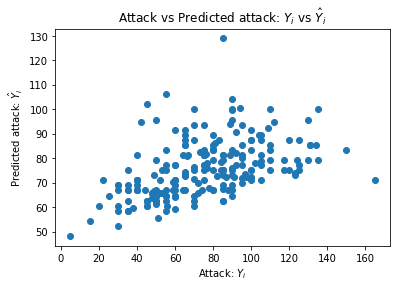

In [13]:
# Plot a scatter plot to compare true attack and the predicted attack.
plot.scatter(y_test, prediction)
plot.xlabel("Attack: $Y_i$")
plot.ylabel("Predicted attack: $\hat{Y}_i$")
plot.title("Attack vs Predicted attack: $Y_i$ vs $\hat{Y}_i$")

In [14]:
# Below are for Second model, determine how does defense, speed and hp influencing attack
###############################################################################################

target = df['attack']
features = df[['defense', 'speed', 'hp']]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=8)

lm = LinearRegression()
lm.fit(x_train, y_train)
prediction = lm.predict(x_test)

print("Second model score: {}".format(lm.score(x_test, y_test)))

mse = np.sqrt(mean_squared_error(y_test, prediction))
print("Mean squared error: {}".format(mse))
print("---------------------------------------------------------------------------------------------------------\n")

Second model score: 0.4608661300244736
Mean squared error: 20.546574664445565
---------------------------------------------------------------------------------------------------------



Text(0.5,1,'Attack vs Predicted attack: $Y_i$ vs $\\hat{Y}_i$')

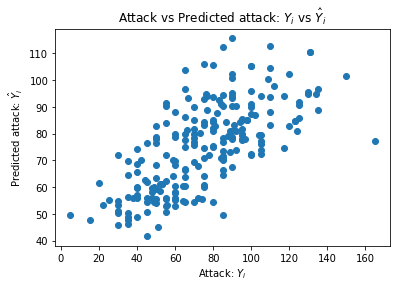

In [15]:
plot.scatter(y_test, prediction)
plot.xlabel("Attack: $Y_i$")
plot.ylabel("Predicted attack: $\hat{Y}_i$")
plot.title("Attack vs Predicted attack: $Y_i$ vs $\hat{Y}_i$")

In [16]:
#-------------------------------------------------------------------------------------------------------------------------------------------#

## Task 3: Classification, find out the pokemon is legendary or not

#  Observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
# Graph visualization for drawing graphs specified in DOT language scripts
import graphviz

# First model, determine legendary respect to all the columns in datasets
###############################################################################################
target = df['legendary']
features = df.drop(['legendary'], axis=1)

# Decision tree can't handle string data, so we have to use LabelEncoder convert it to number
le = preprocessing.LabelEncoder()
for column_name in features.columns:
        if features[column_name].dtype == object:
            # We can always use inverse_transform to revert the changes
            features[column_name] = le.fit_transform(features[column_name])
        else:
            pass

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier().fit(x_train, y_train)

print('Decision tree first model score: {:.2f}'
     .format(clf.score(x_test, y_test)))

Decision tree first model score: 0.98


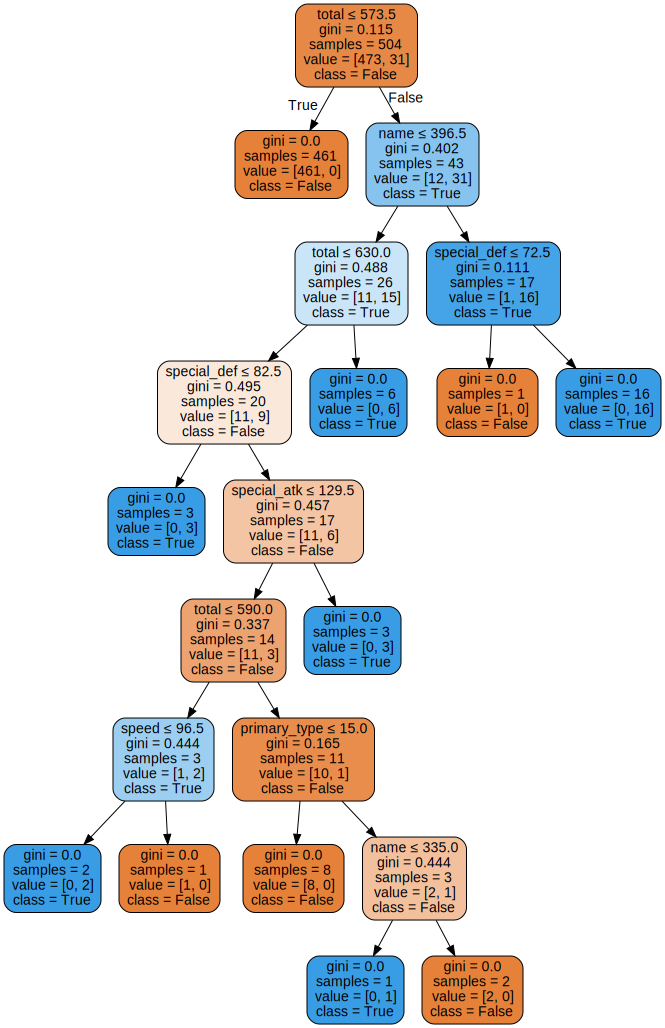

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x_train.columns,
                         class_names=target.unique().astype(str),
                         filled=True, rounded=True,  
                         special_characters=True)  

graphviz.Source(dot_data)

In [18]:
# Below are for Second model, determine legendary respect to defense, speed, and hp 
###############################################################################################
target = df['legendary']
features = df[['attack', 'defense', 'speed']]

le = preprocessing.LabelEncoder()
for column_name in features.columns:
        if features[column_name].dtype == object:
            features[column_name] = le.fit_transform(features[column_name])
        else:
            pass

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier().fit(x_train, y_train)

print('Decision tree second model score: {:.2f}'
     .format(clf.score(x_test, y_test)))

Decision tree second model score: 0.90


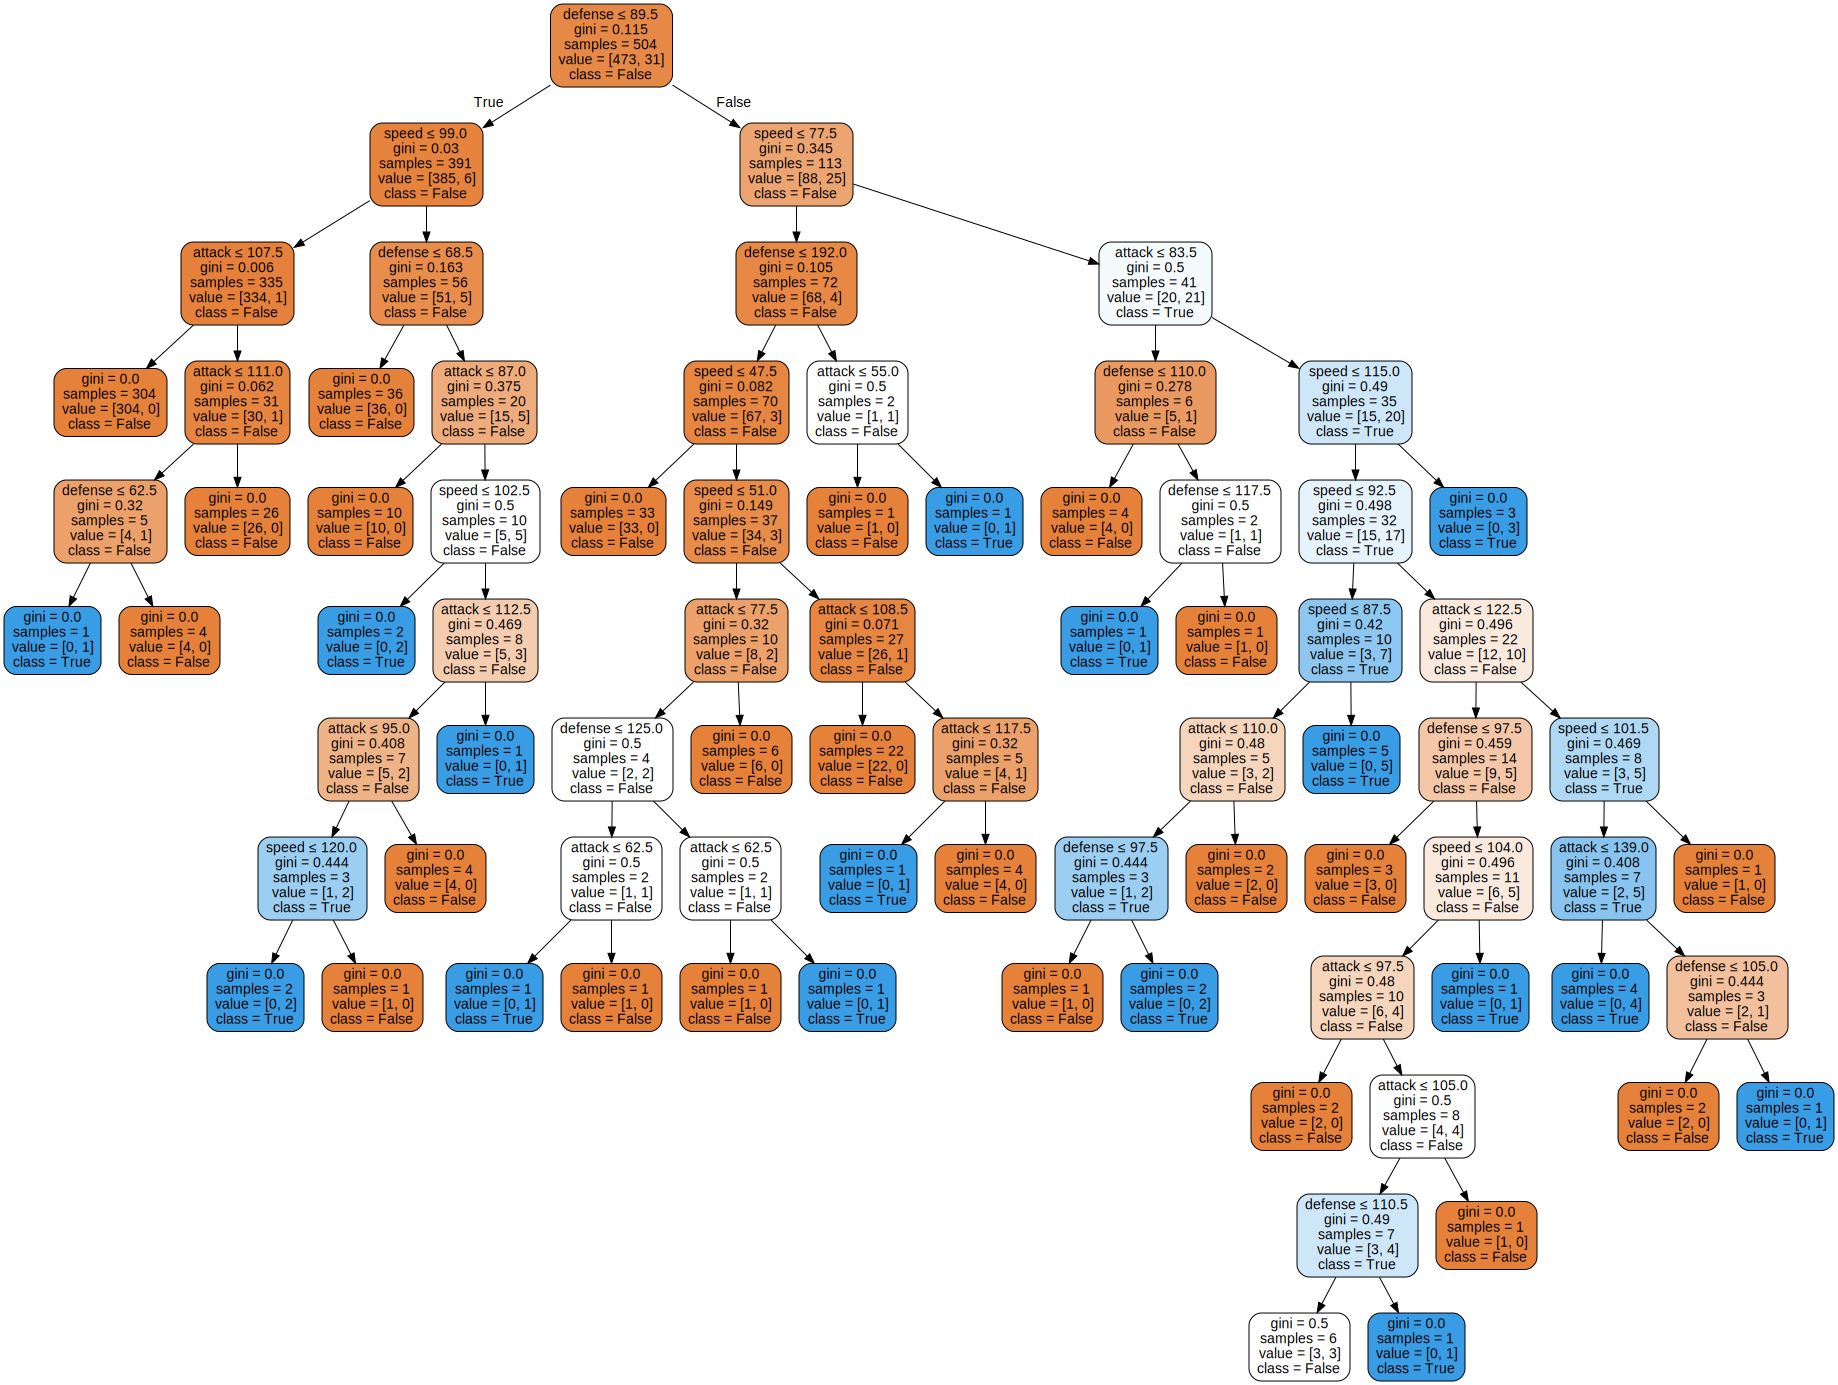

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x_train.columns,
                         class_names=target.unique().astype(str),
                         filled=True, rounded=True,  
                         special_characters=True)  

graphviz.Source(dot_data)

In [20]:
# Below are for third model, determine how does defense, speed and hp influencing primary type
###############################################################################################
target = df['primary_type']
features = df[['attack', 'defense', 'speed']]

le = preprocessing.LabelEncoder()
for column_name in features.columns:
        if features[column_name].dtype == object:
            features[column_name] = le.fit_transform(features[column_name])
        else:
            pass

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier().fit(x_train, y_train)

print('Decision tree second model score: {:.2f}'
     .format(clf.score(x_test, y_test)))

Decision tree second model score: 0.11


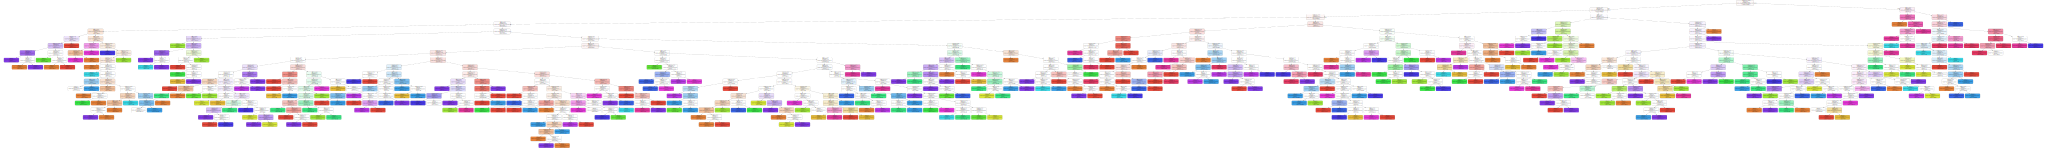

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x_train.columns,
                         class_names=target.unique(),
                         filled=True, rounded=True,  
                         special_characters=True)  

graphviz.Source(dot_data)

In [22]:
# View in pdf file
graphviz.Source(dot_data).view()

'Source.gv.pdf'